In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import FourierGalerkin
# Reloading the module
import importlib
importlib.reload(FourierGalerkin)
from FourierGalerkin import *

The initial conditions are obtained by integration and DFT, which are different. However, there is no significant different between the solutions starting from these two sets of initial values.

Text(0.5, 1.0, 'Using Fourier interpolation as IC')

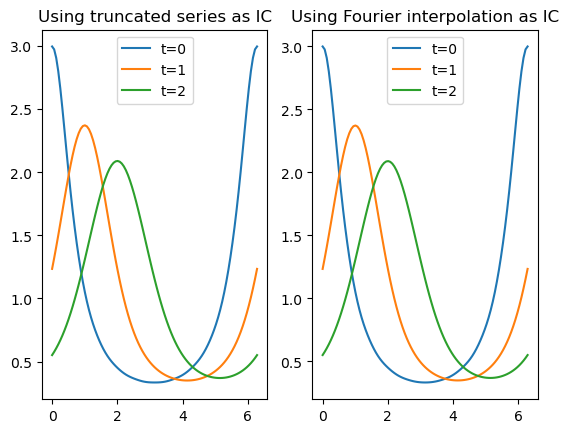

In [23]:
N = 20
nu = 0.1
f = lambda x: 3 / (5 - 4 * np.cos(x))
init_cond = CalcInitCond(f, N)
sol = solve_ivp(CalcRHS_AdvDif, 
                t_span=[0,2], 
                y0=init_cond, 
                method='RK45', 
                t_eval=[0,1,2], 
                args=(N, nu,))

N_eval = 101
x = np.linspace(0, 2*np.pi, N_eval)
NT = 2
f_t = np.zeros((NT+1, N_eval))

for nt in range(NT+1):
    for j in range(N_eval):
        f_t[nt, j] = EvalSolution(x[j], sol.y[:,nt], N)

fig = plt.figure()
ax = fig.add_subplot(121)
for nt in range(NT+1):
    ax.plot(x, f_t[nt, :], label='t={}'.format(nt))

ax.legend()
ax.set_title("Using truncated series as IC")

##############################################################
init_cond = CalcInitCond_DFT(f, N)
sol = solve_ivp(CalcRHS_AdvDif, 
                t_span=[0,2], 
                y0=init_cond, 
                method='RK45', 
                t_eval=[0,1,2], 
                args=(N, nu,))

f_t = np.zeros((NT+1, N_eval))

for nt in range(NT+1):
    for j in range(N_eval):
        f_t[nt, j] = EvalSolution(x[j], sol.y[:,nt], N)
        
ax = fig.add_subplot(122)
for nt in range(NT+1):
    ax.plot(x, f_t[nt, :], label='t={}'.format(nt))

ax.legend()
ax.set_title("Using Fourier interpolation as IC")

Text(0.5, 1.0, 'Using truncated series as IC')

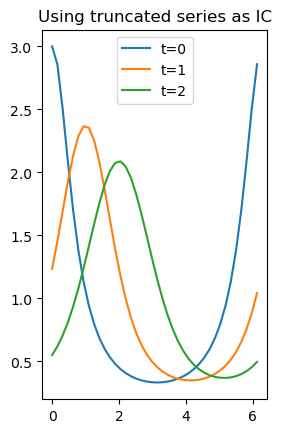

In [25]:
# Evaluate the solution at the Fourier nodes
N = 40
nu = 0.1
f = lambda x: 3 / (5 - 4 * np.cos(x))
init_cond = CalcInitCond(f, N)
sol = solve_ivp(CalcRHS_AdvDif, 
                t_span=[0,2], 
                y0=init_cond, 
                method='RK45', 
                t_eval=[0,1,2], 
                args=(N, nu,))

NT = 2
f_t = np.zeros((NT+1, N))
J = np.arange(0,N)
x = 2 * np.pi/N * J

for nt in range(NT+1):
    f_t[nt, :] = EvalSolution_DFT(sol.y[:,nt], N)

fig = plt.figure()
ax = fig.add_subplot(121)
for nt in range(NT+1):
    ax.plot(x, f_t[nt, :], label='t={}'.format(nt))

ax.legend()
ax.set_title("Using truncated series as IC")